# I - Préparation de données

## 0-Téléchargement de données

In [11]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

## 1- Informations sur les données

In [13]:
X = mnist.keys()
print("Clés disponibles dans le dataset MNIST:")
print(list(X))

Clés disponibles dans le dataset MNIST:
['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [14]:
import numpy as np

# a. Stocker les données dans la variable X
X = mnist.data
print("a. Variable X créée avec les données")

# b. Afficher la taille des données (nombre de features et taille de chaque feature)
print(f"b. Taille des données X: {X.shape}")
print(f"   - Nombre d'échantillons: {X.shape[0]}")
print(f"   - Nombre de features par échantillon: {X.shape[1]}")

# c. Stocker les classes dans la variable Y
Y = mnist.target
print("\nc. Variable Y créée avec les classes")

# d. Afficher la taille des labels/classes
print(f"d. Taille des labels Y: {Y.shape}")
print(f"   - Nombre total de labels: {Y.shape[0]}")

# e. Afficher les différentes classes de la base de données
classes_uniques = np.unique(Y)
print(f"\ne. Classes uniques dans la base de données: {classes_uniques}")
print(f"   - Nombre de classes différentes: {len(classes_uniques)}")

# f. Description détaillée de la base de données
print("\nf. Description détaillée de la base de données:")
print(mnist.DESCR)

a. Variable X créée avec les données
b. Taille des données X: (70000, 784)
   - Nombre d'échantillons: 70000
   - Nombre de features par échantillon: 784

c. Variable Y créée avec les classes
d. Taille des labels Y: (70000,)
   - Nombre total de labels: 70000

e. Classes uniques dans la base de données: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
   - Nombre de classes différentes: 10

f. Description détaillée de la base de données:
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learni

=== Analyse de la première instance de MNIST ===

a. Affichage de la première instance:
   i. Première instance extraite avec X.values[0]
      Forme originale: (784,)
   ii. Image redimensionnée en 28x28: (28, 28)


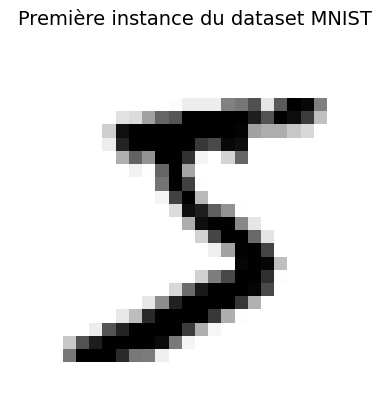

   iii. Image affichée en niveau de gris
        Valeurs min/max des pixels: 0.0 à 255.0

b. Analyse de la première instance:
   - Classe de la première instance: 5
   - Type de la classe: <class 'numpy.uint8'>
   - Type de l'instance (données): <class 'numpy.ndarray'>

=== Conclusion ===
La première image du dataset MNIST représente le chiffre: 5


In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Analyse de la première instance de MNIST ===\n")

# a. Affichage de la première instance de la base de données
print("a. Affichage de la première instance:")

# i. Utiliser l'attribut "values" du dictionnaire X
premiere_instance = X.values[0]
print(f"   i. Première instance extraite avec X.values[0]")
print(f"      Forme originale: {premiere_instance.shape}")

# ii. Redimensionner via la fonction "reshape" de numpy en taille 28,28
image_2d = premiere_instance.reshape(28, 28)
print(f"   ii. Image redimensionnée en 28x28: {image_2d.shape}")

# iii. Utiliser imshow avec cmap=mpl.cm.binary pour affichage en niveau de gris
plt.figure()
plt.imshow(image_2d, cmap=mpl.cm.binary)
plt.title("Première instance du dataset MNIST", fontsize=14)
plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
plt.show()

print(f"   iii. Image affichée en niveau de gris")
print(f"        Valeurs min/max des pixels: {premiere_instance.min():.1f} à {premiere_instance.max():.1f}")

# b. Afficher la classe et le type de la première instance
print(f"\nb. Analyse de la première instance:")
classe_premiere = Y.iloc[0]  # Utiliser iloc pour pandas Series
print(f"   - Classe de la première instance: {classe_premiere}")
print(f"   - Type de la classe: {type(classe_premiere)}")
print(f"   - Type de l'instance (données): {type(premiere_instance)}")

print(f"\n=== Conclusion ===")
print(f"La première image du dataset MNIST représente le chiffre: {classe_premiere}")

In [16]:
print("=== Conversion des labels en valeurs numériques ===\n")

# Afficher le type actuel des labels
print(f"Type actuel de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (avant casting): {list(Y.head())}")

# Appliquer le casting sur les labels
Y = Y.astype(np.uint8)

# Vérifier le résultat du casting
print(f"\nAprès casting:")
print(f"Type de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (après casting): {list(Y.head())}")

# Vérifier que la classe de la première instance est maintenant numérique
classe_premiere_numerique = Y.iloc[0]
print(f"\nClasse de la première instance (numérique): {classe_premiere_numerique}")
print(f"Type de la classe: {type(classe_premiere_numerique)}")
print(f"\n=== Conclusion ===")
print("Les labels ont été convertis en valeurs numériques avec succès.")

=== Conversion des labels en valeurs numériques ===

Type actuel de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'str'>
Premiers labels (avant casting): ['5', '0', '4', '1', '9']

Après casting:
Type de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'numpy.uint8'>
Premiers labels (après casting): [5, 0, 4, 1, 9]

Classe de la première instance (numérique): 5
Type de la classe: <class 'numpy.uint8'>

=== Conclusion ===
Les labels ont été convertis en valeurs numériques avec succès.


## 2- Répartition des données

In [22]:
print("=== Répartition des données MNIST ===\n")

# Vérification de la taille totale des données
print(f"Taille totale des données: {X.shape[0]} échantillons")
print(f"Taille totale des labels: {Y.shape[0]} échantillons")

# Répartition des données en une seule ligne (indexing sur ndarrays)
# a. Les 60 000 premières images composeront la base d'apprentissage
# b. Le reste des images constitue la base de test
X_train, X_test = X.iloc[:60000], X.iloc[60000:]
Y_train, Y_test = Y.iloc[:60000], Y.iloc[60000:]

print(f"\n=== Résultats de la répartition ===")
print(f"Données d'apprentissage:")
print(f"  - X_train: {X_train.shape} échantillons")
print(f"  - Y_train: {Y_train.shape} labels")

print(f"\nDonnées de test:")
print(f"  - X_test: {X_test.shape} échantillons") 
print(f"  - Y_test: {Y_test.shape} labels")

print(f"\n=== Vérification ===")
print(f"Total apprentissage + test: {X_train.shape[0] + X_test.shape[0]} échantillons")
print(f"Cohérent avec le total original: {X_train.shape[0] + X_test.shape[0] == X.shape[0]}")

print(f"\nRépartition terminée!")
print(f"60 000 échantillons pour l'apprentissage")
print(f"{X_test.shape[0]} échantillons pour le test")

=== Répartition des données MNIST ===

Taille totale des données: 70000 échantillons
Taille totale des labels: 70000 échantillons

=== Résultats de la répartition ===
Données d'apprentissage:
  - X_train: (60000, 784) échantillons
  - Y_train: (60000,) labels

Données de test:
  - X_test: (10000, 784) échantillons
  - Y_test: (10000,) labels

=== Vérification ===
Total apprentissage + test: 70000 échantillons
Cohérent avec le total original: True

Répartition terminée!
60 000 échantillons pour l'apprentissage
10000 échantillons pour le test


# II- Apprentissage d'un classifieur binaire

## 2 - Apprentissage des données

In [26]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

print(f"\n=== Résultats de la répartition ===")
print(f"\ny_train_5: {y_train_5}")
print(f"\ny_test_5: {y_test_5}")


=== Résultats de la répartition ===

y_train_5: 0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

y_test_5: 60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool
